In [1]:
# Librerias usadas
import numpy as np
import pandas as pd
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.signal import firwin, freqz, spectrogram
from glob import glob

# Cargar la ubicación de la señal de audio de entrada
audio_file = glob('C:/Users/Erick Ramon/Downloads/lineales trabnajo/ambient-piano.mp3')

In [2]:
# Cargar el archivo de audio en un array "audio" y extraer su sample rate en una variable "sr"
audio_in, sr = librosa.load(audio_file[0])

print(f'Datos audio de entrada: {audio_in[:10]}') # Primeros 10 datos de la señal de audio
print(f'Shape audio de entrada: {audio_in.shape}') # Tamaño del array de la señal de audio
print(f'Sample Rate: {sr}') # Sample rate de la señal de audio

Datos audio de entrada: [-6.8212103e-13 -4.5474735e-13  4.8316906e-13  1.5916157e-12
 -3.9790393e-13  2.7284841e-12 -6.8212103e-13 -1.0231815e-12
 -2.7284841e-12 -9.6633812e-13]
Shape audio de entrada: (232128,)
Sample Rate: 22050


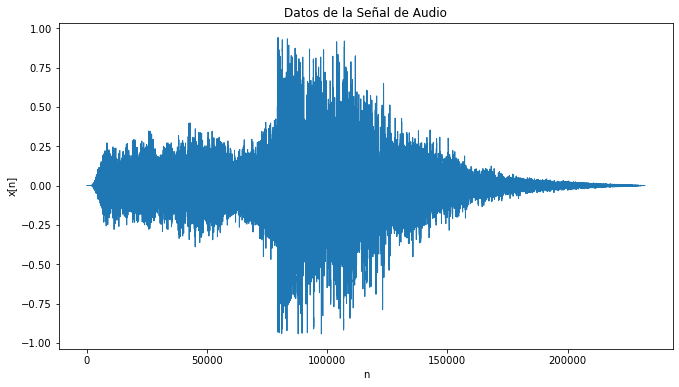

In [3]:
# Graficar datos en el tiempo de la señal de audio
pd.Series(audio_in).plot(figsize=(11, 6), lw=1, title='Datos de la Señal de Audio')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

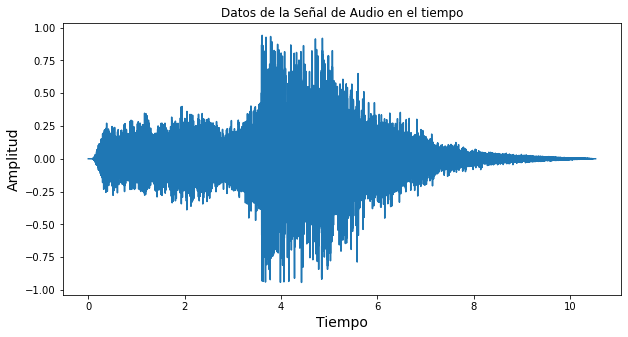

Text(0.5, 1.0, 'Frecuencias de la Señal de Audio')

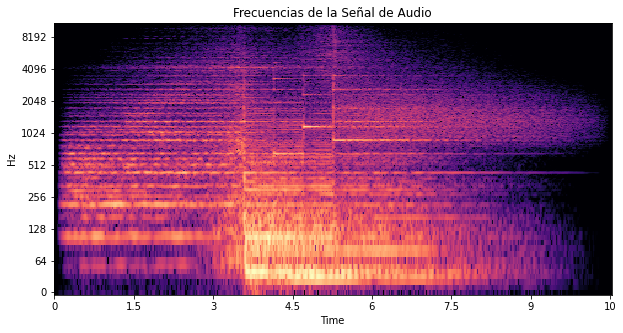

In [4]:
# Graficar datos en el tiempo de la señal de audio
time_axis_xn = np.arange(0, len(audio_in)) / sr
plt.figure(figsize=(10,5))
plt.plot(time_axis_xn, audio_in)
plt.xlabel('Tiempo', fontsize='14')
plt.title('Datos de la Señal de Audio en el tiempo')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

# Graficar el espectro de frecuencias de la señal de audio
TF_audio = librosa.stft(audio_in)
Amp_audio_db = librosa.amplitude_to_db(abs(TF_audio), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(Amp_audio_db, x_axis='time', y_axis='log', ax=ax)
plt.title('Frecuencias de la Señal de Audio')

X(jw)= [-28.421082  -0.j        12.02609  +12.886331j  -3.1719122 -7.024541j ...
  -8.2631645 -8.609078j  -3.1719122 +7.024541j  12.02609  -12.886331j]
X(jw)= 232128


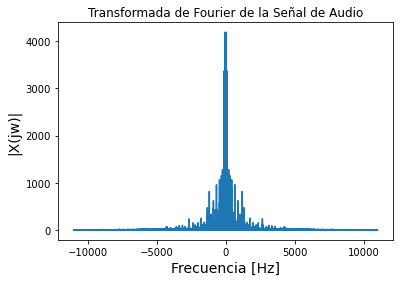

In [5]:
# Cálculo de la TF de la señal de audio de entrada
TF_entrada = fourier.fft(audio_in)
print(f'X(jw)= {TF_entrada}') # Primeros valores de la TF del audio
print(f'X(jw)= {len(TF_entrada)}') # Primeros valores de la TF del audio

# Cálculo de la magnitud de la TF de la señal de audio
Mag_TF_in = abs(TF_entrada)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(audio_in), 1/sr)

# Graficar la TF de la señal de audio
plt.plot(vect_frec, Mag_TF_in)
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.title('Transformada de Fourier de la Señal de Audio')
plt.ylabel('|X(jw)|', fontsize='14')
plt.show()

## Sampling Rate Conversor

## Expansion

In [6]:
# Bloque de Expansión
L = 4 # Factor de Expansión
M = 2 # Factor de Decimación

# Conjunto de datos a expandir:
expandir = list(audio_in) # Señal de audio
expandido = []

# Bucle for inserta L-1 ceros entre cada muestra
for k in range(0, len(expandir)):
    expandido.append(expandir[k])
    if k != len(expandir)-1:
        for j in range(0, L-1):
            expandido.append(0)

expandido = np.array(expandido)
print(f'Señal original= {audio_in[0:10]}')
print(f'Señal expandida= {expandido[0:10]}')

Señal original= [-6.8212103e-13 -4.5474735e-13  4.8316906e-13  1.5916157e-12
 -3.9790393e-13  2.7284841e-12 -6.8212103e-13 -1.0231815e-12
 -2.7284841e-12 -9.6633812e-13]
Señal expandida= [-6.82121026e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.54747351e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.83169060e-13  0.00000000e+00]


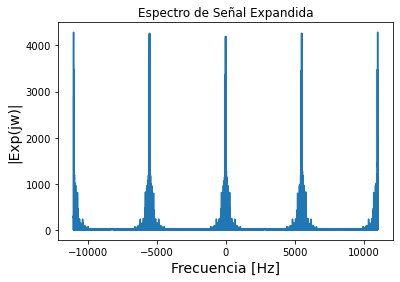

In [7]:
# Cálculo de la TF de la señal de audio expandida
TF_expandido = fourier.fft(expandido)

# Cálculo de la magnitud de la TF
Mag_TF_ex = abs(TF_expandido)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(Mag_TF_ex), (1/(sr)))

# Graficar la TF de la señal expandida
plt.plot(vect_frec, Mag_TF_ex)
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.title('Espectro de Señal Expandida')
plt.ylabel('|Exp(jw)|', fontsize='14')
plt.show()

h[n]= [4.53488642e-09 4.18569303e-08 5.46640765e-08 ... 5.46640765e-08
 4.18569303e-08 4.53488642e-09]


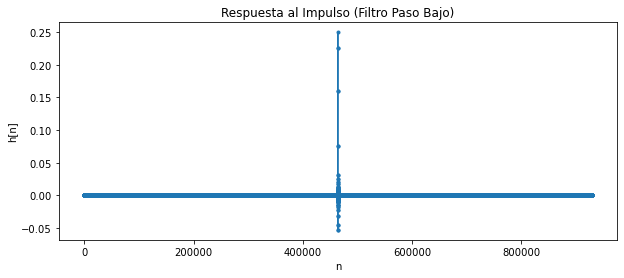

In [8]:
# Diseño de filtro FIR   
h_bajo = firwin(numtaps=len(expandido), cutoff=(sr/2)/L, window='hamming', pass_zero=True, fs=sr+2)

print(f'h[n]= {h_bajo}') # Primeros valores de la respuesta al impulso

#Graficar los valores de la respuesta al impulso
pd.Series(h_bajo).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Filtro Paso Bajo)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

H[jw]= [ 1.        -0.00000000e+00j -0.99999973-3.38348018e-06j
  1.        +6.76696220e-06j ... -0.99999973+1.01504405e-05j
  1.        -6.76696220e-06j -0.99999973+3.38348018e-06j]


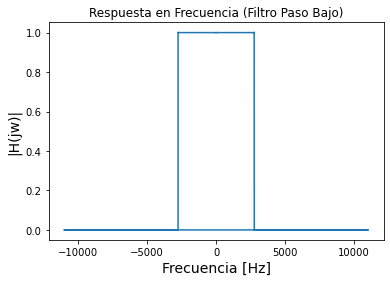

In [9]:
# Obtención de la respuesta en Frecuencia
H_jw = fourier.fft(h_bajo)

print(f'H[jw]= {H_jw}') # Algunos valores de la respuesta en Frecuencia

# Cálculo de la magnitud de la TF
Mag_H_jw = abs(H_jw)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(expandido), 1/sr)

# Graficar los valores de la respuesta en Frecuencia
plt.plot(vect_frec, Mag_H_jw)
plt.title('Respuesta en Frecuencia (Filtro Paso Bajo)')
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.ylabel('|H(jw)|', fontsize='14')
plt.show()

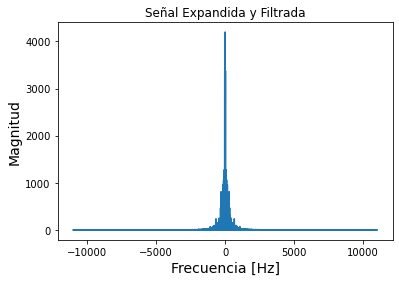

In [10]:
# Multiplicacion en frecuencia
Ef = TF_expandido*H_jw
# Magnitud del producto
Mag_Ef = abs(Ef)

exp_fil = fourier.ifft(Ef)
exp_fil = np.concatenate((exp_fil[len(exp_fil)//2: len(exp_fil)], exp_fil[0: len(exp_fil)//2]), axis=None)

rec_exp = Ef
for i in range(len(Ef)//2, len(Ef)):
    rec_exp[i] = 0

# Transformada inversa de la señal filtrada
exp_fil_ad = fourier.ifft(rec_exp)
exp_fil_ad = np.concatenate((exp_fil_ad[len(exp_fil_ad)//2: len(exp_fil_ad)], exp_fil_ad[0: len(exp_fil_ad)//2]), axis=None)

vect_frec_exp = fourier.fftfreq(len(Ef), 1/sr)
# Graficar espectro de frecuencia de la señal filtrada
plt.plot(vect_frec_exp, Mag_Ef)
plt.title('Señal Expandida y Filtrada')
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.ylabel('Magnitud', fontsize='14')
plt.show()

In [11]:
print(f'Señal expandida filtrada= {exp_fil[0:10]}')

Señal expandida filtrada= [ 1.05580033e-07-2.86374231e-17j  6.09166352e-08-1.21466683e-17j
  1.90129004e-08-8.93225775e-18j -1.36580537e-08-3.46831085e-17j
 -2.30480898e-08+1.04500953e-17j -1.43241754e-08-2.58018363e-17j
 -8.78188530e-09+3.10566673e-19j -1.14972084e-08-3.59609474e-17j
 -9.91016445e-09-9.98604394e-18j -3.53926048e-09+7.01292347e-18j]


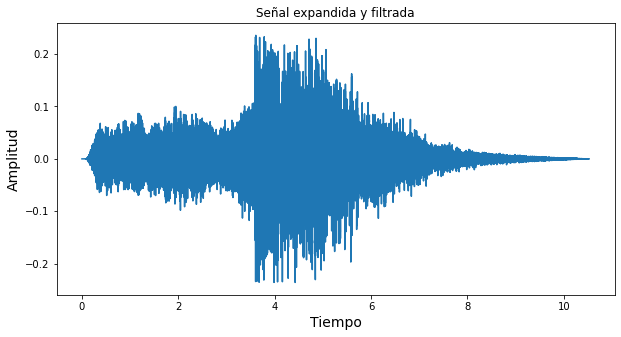

In [12]:
# Graficar señal de audio expandida y filtrada
time_axis_yn = np.arange(0, len(exp_fil_ad)) / (sr*L)
plt.figure(figsize=(10,5))
plt.plot(time_axis_yn, np.real(exp_fil))
plt.xlabel('Tiempo', fontsize='14')
plt.title('Señal expandida y filtrada')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [13]:
ipd.Audio(np.real(exp_fil_ad), rate=sr*L) #Reproducir el audio resultante

## Decimation

In [14]:
# Señal a decimar:
decimar = list(np.real(exp_fil))
# Proceso de decimación
y_n = [decimar[i] for i in range(0, len(decimar)) if i % M == 0]
y_n = np.array(y_n)

# Mostrar resultado:
print(f'Señal original = {np.real(exp_fil)[0:10]}')
print(f'Señal decimada = {y_n[0:10]}')

Señal original = [ 1.05580033e-07  6.09166352e-08  1.90129004e-08 -1.36580537e-08
 -2.30480898e-08 -1.43241754e-08 -8.78188530e-09 -1.14972084e-08
 -9.91016445e-09 -3.53926048e-09]
Señal decimada = [ 1.05580033e-07  1.90129004e-08 -2.30480898e-08 -8.78188530e-09
 -9.91016445e-09 -4.64142708e-09 -1.16562987e-08 -5.20701185e-09
 -1.53879156e-08 -4.45205893e-09]


Cantidad de elementos= 464255


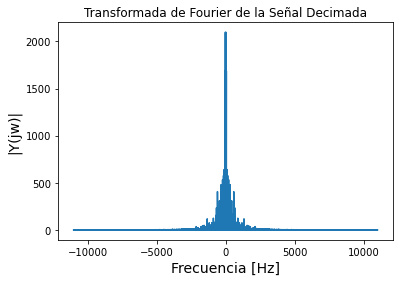

In [15]:
# Cálculo de la TF de la señal decimada
TF_decimado = fourier.fft(y_n)
print(f'Cantidad de elementos= {len(TF_decimado)}')

# Cálculo de la magnitud de la TF de la señal decimada
Mag_TF_dc = abs(TF_decimado)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(y_n), 1/(sr))

# Graficar la TF de la señal decimada
plt.plot(vect_frec, Mag_TF_dc)
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.title('Transformada de Fourier de la Señal Decimada')
plt.ylabel('|Y(jw)|', fontsize='14')
plt.show()

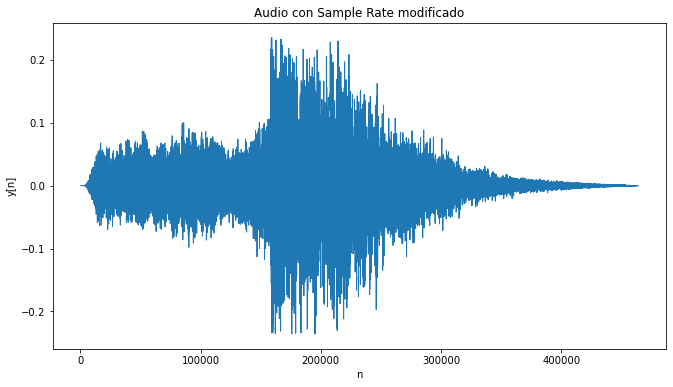

In [16]:
# Graficar datos en el tiempo de la señal de audio
pd.Series(y_n).plot(figsize=(11, 6), lw=1, title='Audio con Sample Rate modificado')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

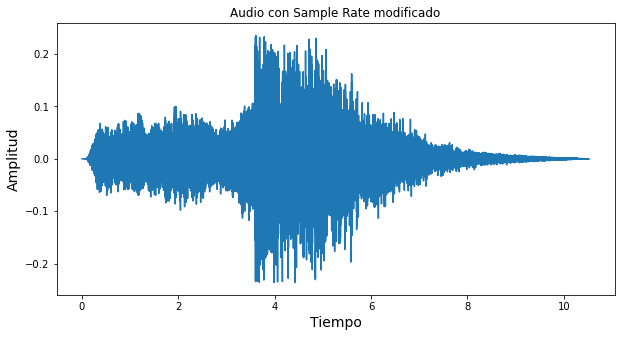

In [17]:
# Graficar datos en el tiempo de la señal de audio decimada
time_axis_yn = np.arange(0, len(y_n)) / ((sr*L)/M)
plt.figure(figsize=(10,5))
plt.plot(time_axis_yn, y_n)
plt.xlabel('Tiempo', fontsize='14')
plt.title('Audio con Sample Rate modificado')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [18]:
ipd.Audio(y_n, rate=(sr*L)/M) #Reproducir el audio resultante CORRECTA

In [37]:
print(f'Nuevo Sample Rate = {(sr*L)/M} Hz')

Nuevo Sample Rate = 44100.0 Hz


## Equalizer

h[n]= [-1.68778623e-08 -1.77951188e-08 -1.87090745e-08 ... -1.87090745e-08
 -1.77951188e-08 -1.68778623e-08]


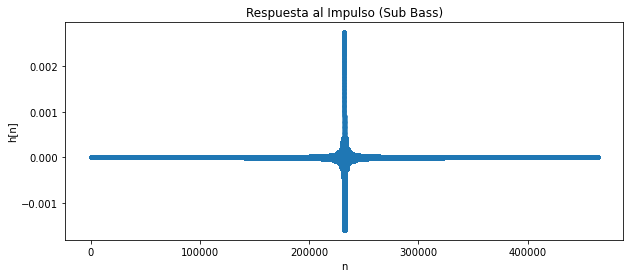

In [20]:
# Diseño del filtro FIR paso banda sub_bass
g1, g2, g3, g4, g5, g6 = 1, 2, 3, 4, 5, 6

h_sub_bass = g1*firwin(numtaps=len(y_n), cutoff=[16, 60], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_sub_bass}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_sub_bass).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Sub Bass)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

h[n]= [2.15674491e-07 2.24823615e-07 2.33542235e-07 ... 2.33542235e-07
 2.24823615e-07 2.15674491e-07]


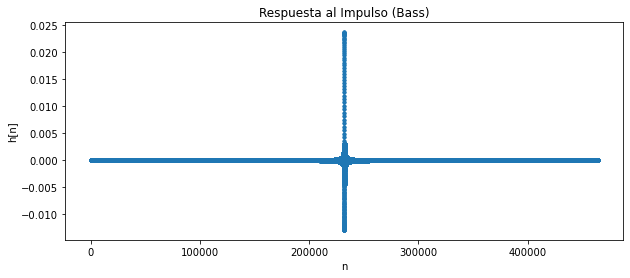

In [21]:
# Diseño del filtro FIR paso banda bass
h_bass = g2*firwin(numtaps=len(y_n), cutoff=[60, 250], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_bass}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_bass).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Bass)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

h[n]= [-4.85970013e-07 -5.67692116e-07 -6.02636119e-07 ... -6.02636119e-07
 -5.67692116e-07 -4.85970013e-07]


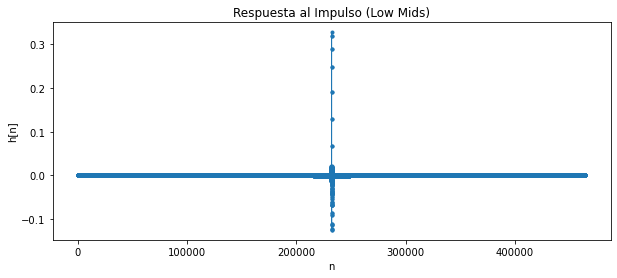

In [22]:
# Diseño del filtro FIR paso banda low mids
h_low_mids = g3*firwin(numtaps=len(y_n), cutoff=[250, 2000], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_low_mids}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_low_mids).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Low Mids)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

h[n]= [-1.29879578e-07  9.14563367e-08  4.34500704e-07 ...  4.34500704e-07
  9.14563367e-08 -1.29879578e-07]


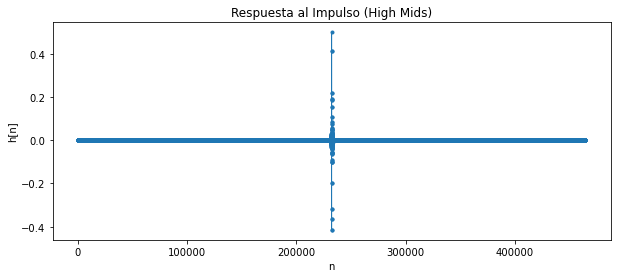

In [23]:
# Diseño del filtro FIR paso banda high mids
h_high_mids = g4*firwin(numtaps=len(y_n), cutoff=[2000, 4000], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_high_mids}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_high_mids).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (High Mids)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

h[n]= [1.55530185e-07 5.94255501e-07 5.53836199e-07 ... 5.53836199e-07
 5.94255501e-07 1.55530185e-07]


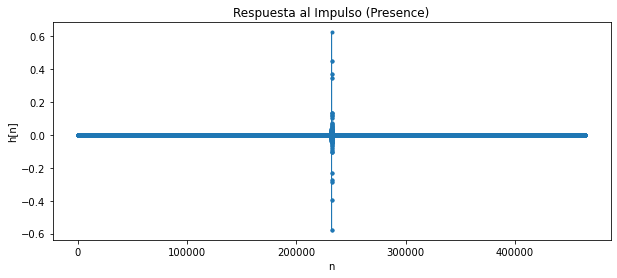

In [24]:
# Diseño del filtro FIR paso banda presence
h_presence = g5*firwin(numtaps=len(y_n), cutoff=[4000, 6000], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_presence}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_presence).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Presence)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

h[n]= [ 4.94793542e-07 -2.67896022e-07 -6.32320885e-07 ... -6.32320885e-07
 -2.67896022e-07  4.94793542e-07]


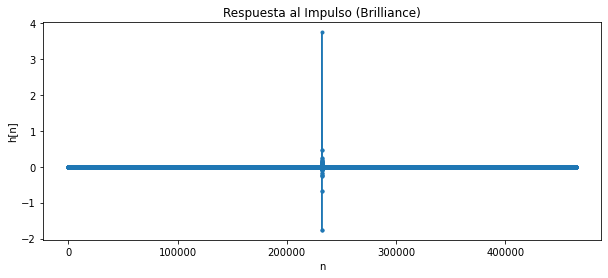

In [25]:
# Diseño del filtro FIR paso banda brilliance
h_brilliance = g6*firwin(numtaps=len(y_n), cutoff=[6000, 16000], window='hamming', pass_zero=False, fs=32020)

print(f'h[n]= {h_brilliance}') # Primeros valores de la respuesta al impulso

# Graficar la respuesta al impulso del filtro paso banda
pd.Series(h_brilliance).plot(figsize=(10, 4), lw=1, marker='.', title='Respuesta al Impulso (Brilliance)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

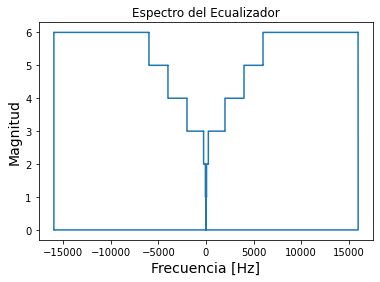

In [26]:
# Suma de las respuestas al impulso para formar un solo filtro multibanda
EQ = (fourier.fft(h_sub_bass) + fourier.fft(h_bass) + fourier.fft(h_low_mids) + fourier.fft(h_high_mids) + 
    fourier.fft(h_presence) + fourier.fft(h_brilliance))

Mag_TF_EQ = abs(EQ)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(EQ), 1/32020)

# Graficar la TF de la señal de audio
plt.plot(vect_frec, Mag_TF_EQ)
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.title('Espectro del Ecualizador')
plt.ylabel('Magnitud', fontsize='14')
plt.show()

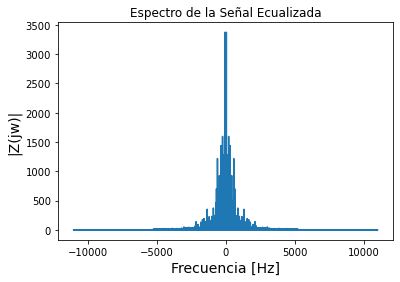

In [32]:
# Aplicación del filtro multibanda
Ecualizar = TF_decimado*EQ

# Cálculo de la magnitud de la TF de la señal de audio
Mag_TF_out = abs(Ecualizar)

reconstruir = Ecualizar

for i in range(len(Ecualizar)//2, len(Ecualizar)):
    reconstruir[i] = 0

audio_out = fourier.ifft(reconstruir)
audio_out = np.concatenate(((audio_out[len(audio_out)//2: len(audio_out)], audio_out[0: len(audio_out)//2])), axis=None)

# Generación de un vector de frecuencias
vect_frec = fourier.fftfreq(len(Mag_TF_out), 1/sr)

# Graficar la TF de la señal ecualizada
plt.plot(vect_frec, Mag_TF_out)
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.title('Espectro de la Señal Ecualizada')
plt.ylabel('|Z(jw)|', fontsize='14')
plt.show()

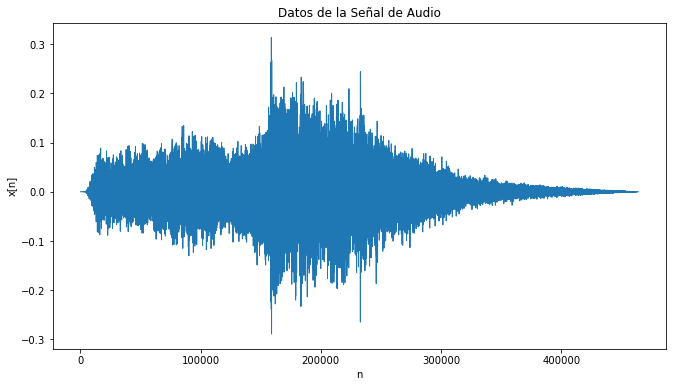

In [33]:
# Graficar datos en el tiempo de la señal de audio
pd.Series(np.real(audio_out)).plot(figsize=(11, 6), lw=1, title='Datos de la Señal de Audio')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

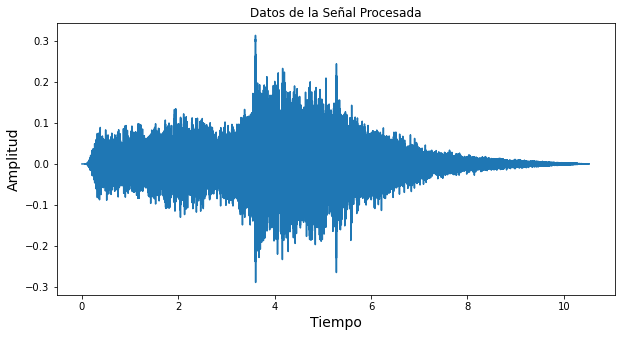

In [34]:
# Graficar datos en el tiempo de la señal de audio
time_axis_zn = np.arange(0, len(audio_out)) / ((sr*L)/M)
plt.figure(figsize=(10,5))
plt.plot(time_axis_zn, np.real(audio_out))
plt.xlabel('Tiempo', fontsize='14')
plt.title('Datos de la Señal Procesada')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [35]:
ipd.Audio(np.real(audio_out), rate=(sr*L)/M) #Reproducir el audio resultante